In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("earthquakes_2023_global.csv")
df.head(5)

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-01-01T00:49:25.294Z,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,2023-03-11T22:51:52.040Z,"Rat Islands, Aleutian Islands, Alaska",earthquake,8.46,21.213,0.097,14.0,reviewed,us,us
1,2023-01-01T01:41:43.755Z,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,2023-03-11T22:51:45.040Z,"23 km ESE of Manay, Philippines",earthquake,5.51,7.445,0.083,43.0,reviewed,us,us
2,2023-01-01T03:29:31.070Z,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,2023-03-11T22:51:29.040Z,Puerto Rico region,earthquake,0.91,15.950,0.090,16.0,reviewed,pr,pr
3,2023-01-01T04:09:32.814Z,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,2023-03-11T22:51:45.040Z,"99 km SSW of Pagar Alam, Indonesia",earthquake,10.25,6.579,0.238,5.0,reviewed,us,us
4,2023-01-01T04:29:13.793Z,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,2023-03-11T22:51:38.040Z,"59 km SSW of Unalaska, Alaska",earthquake,1.41,1.999,0.085,18.0,reviewed,us,us


# Exploratory Data Analysis

In [2]:
#Check shape
df.shape

(26642, 22)

In [3]:
#Check variables type
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [4]:
#Check dataset description
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,26642.000000,26642.000000,26642.000000,26642.000000,25227.000000,25225.000000,24776.000000,26642.000000,25093.000000,26642.000000,24970.000000,25065.000000
mean,16.852798,-11.487497,67.491224,4.007395,42.571332,124.930971,2.692908,0.581575,7.017267,4.475056,0.122735,33.315939
std,30.389200,130.053399,116.762456,0.794423,37.662352,67.430145,4.043568,0.256276,4.072365,4.451649,0.102271,48.022567
min,-65.849700,-179.998700,-3.370000,2.600000,0.000000,8.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000
25%,-6.415275,-149.608650,10.000000,3.220000,19.000000,73.000000,0.612000,0.410000,4.140000,1.848000,0.080000,10.000000
50%,18.884167,-64.811833,21.998000,4.300000,30.000000,111.000000,1.579000,0.590000,7.060000,2.019000,0.111000,18.000000
75%,41.827950,126.965100,66.833000,4.500000,52.000000,165.000000,3.172000,0.750000,9.730000,6.669000,0.150000,36.000000
max,86.593900,179.999400,681.238000,7.800000,423.000000,350.000000,50.820000,1.880000,99.000000,60.670000,4.490000,884.000000


### Extra data points: Obtain year, month and day columns

In [5]:
# Convert the time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Extract year, month, day into separate columns
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day
0,2023-01-01 00:49:25.294000+00:00,52.0999,178.5218,82.770,3.10,ml,14.0,139.0,0.8700,0.18,...,8.46,21.213,0.097,14.0,reviewed,us,us,2023,1,1
1,2023-01-01 01:41:43.755000+00:00,7.1397,126.7380,79.194,4.50,mb,32.0,104.0,1.1520,0.47,...,5.51,7.445,0.083,43.0,reviewed,us,us,2023,1,1
2,2023-01-01 03:29:31.070000+00:00,19.1631,-66.5251,24.000,3.93,md,23.0,246.0,0.8479,0.22,...,0.91,15.950,0.090,16.0,reviewed,pr,pr,2023,1,1
3,2023-01-01 04:09:32.814000+00:00,-4.7803,102.7675,63.787,4.30,mb,17.0,187.0,0.4570,0.51,...,10.25,6.579,0.238,5.0,reviewed,us,us,2023,1,1
4,2023-01-01 04:29:13.793000+00:00,53.3965,-166.9417,10.000,3.00,ml,19.0,190.0,0.4000,0.31,...,1.41,1.999,0.085,18.0,reviewed,us,us,2023,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26637,2023-12-29 03:37:19.334000+00:00,-6.9527,154.9829,10.000,5.20,mb,72.0,60.0,3.9240,0.93,...,10.07,1.765,0.048,141.0,reviewed,us,us,2023,12,29
26638,2023-12-29 04:38:54.109000+00:00,32.3262,141.7386,10.000,5.10,mb,74.0,121.0,1.8030,0.70,...,9.17,1.870,0.042,187.0,reviewed,us,us,2023,12,29
26639,2023-12-29 08:42:05.747000+00:00,-7.2411,68.0663,10.000,5.10,mb,60.0,54.0,12.7760,0.57,...,8.02,1.792,0.090,40.0,reviewed,us,us,2023,12,29
26640,2023-12-29 11:02:48.679000+00:00,-19.1602,169.0428,153.264,4.70,mb,40.0,61.0,3.7460,0.82,...,8.52,7.433,0.081,46.0,reviewed,us,us,2023,12,29


In [6]:
# # Copy the original DataFrame
# cdf = df.copy()

# # Filter based on the type of event, for example, 'Earthquake'
# newdf = cdf[cdf['type'] == 'earthquake']

### Earthquakes Over Time

#### Earthquakes Occurences by Month

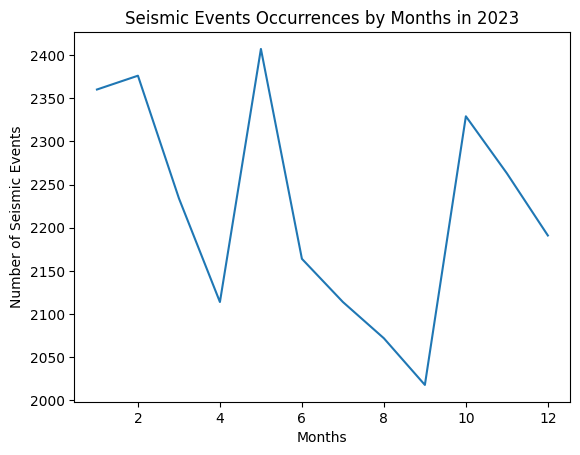

In [7]:
# Group the data by year and count the occurrences
earthquake_counts = df['month'].value_counts().sort_index()

# Create a line graph
plt.plot(earthquake_counts.index, earthquake_counts.values)

# Set the labels and title
plt.xlabel('Months')
plt.ylabel('Number of Seismic Events')
plt.title('Seismic Events Occurrences by Months in 2023')

# Display the line graph
plt.show()

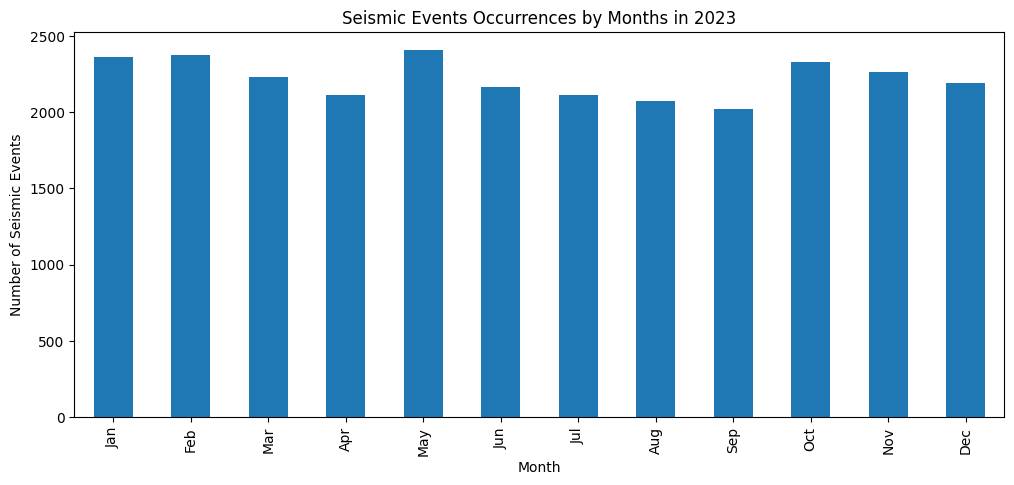

In [8]:
# Calculate the count of earthquakes for each month
earthquakes_by_month = df['month'].value_counts().sort_index()

# Plot the count of earthquakes by month
earthquakes_by_month.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Month')
plt.ylabel('Number of Seismic Events')
plt.title('Seismic Events Occurrences by Months in 2023')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

### Density Distribution of Earthquake Magnitude

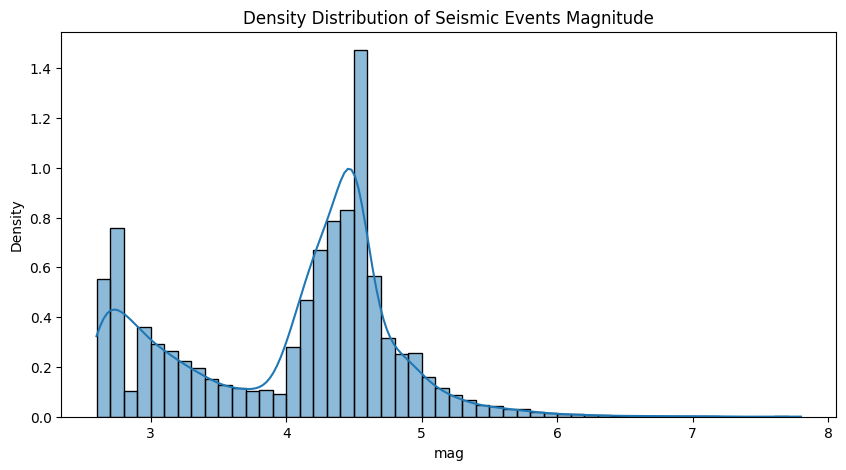

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='mag', stat='density', binwidth=.1, kde=True)
plt.title('Density Distribution of Seismic Events Magnitude')
plt.show()

### Density Distribution of Earthquake Depth

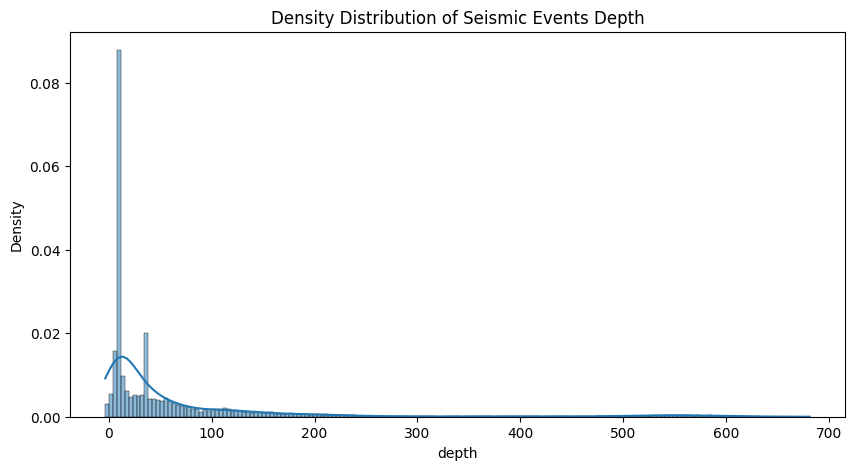

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='depth', stat='density', kde=True)
plt.title('Density Distribution of Seismic Events Depth')
plt.show()

### Heatmap of Numeric Variables

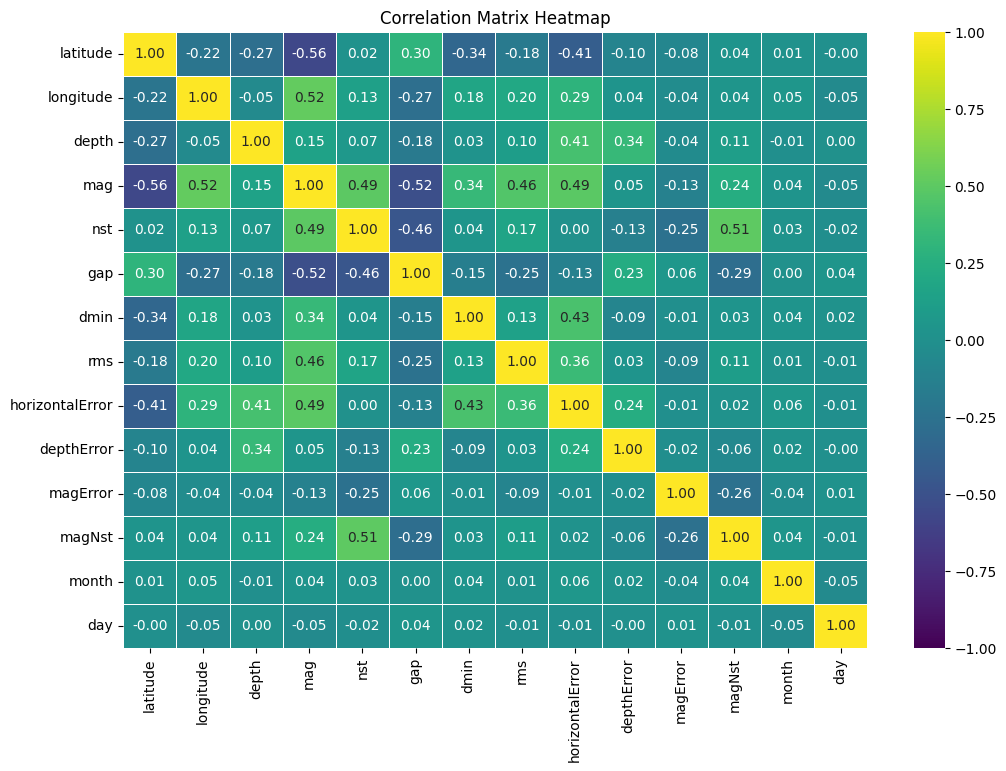

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).drop(['year'], axis=1)
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Plot

In [12]:
fig = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    size='mag',
    color='mag',
    hover_name='place',
    projection='natural earth',
    title='Geographical Distribution of Earthquakes',
    size_max=15,
    color_continuous_scale='Viridis'
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Data Preprocessing